Me parece pequeño este para poder hacer un trabajo de este calibre

In [1]:
import pandas as pd

db = pd.read_csv('./KAG_conversion_data.csv')

In [2]:
db.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
db.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [4]:
db_trimmed = db.drop(['ad_id', 'xyz_campaign_id', 'fb_campaign_id'], axis=1)
db_trimmed.head()

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,30-34,M,15,7350,1,1.43,2,1
1,30-34,M,16,17861,2,1.82,2,0
2,30-34,M,20,693,0,0.00,1,0
3,30-34,M,28,4259,1,1.25,1,0
4,30-34,M,28,4133,1,1.29,1,1


In [5]:
db_dummies = pd.get_dummies(db_trimmed, columns=['age', 'gender'])
db_dummies.head()

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,15,7350,1,1.43,2,1,True,False,False,False,False,True
1,16,17861,2,1.82,2,0,True,False,False,False,False,True
2,20,693,0,0.00,1,0,True,False,False,False,False,True
3,28,4259,1,1.25,1,0,True,False,False,False,False,True
4,28,4133,1,1.29,1,1,True,False,False,False,False,True


In [6]:
correlation_matrix = db_dummies.corr()
correlation_matrix

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
interest,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353,-0.055644,0.021583,0.029271,0.015942,0.047230,-0.047230
Impressions,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249,-0.066877,-0.028549,0.002822,0.102743,0.067059,-0.067059
Clicks,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526,-0.150856,-0.044296,0.028765,0.191246,0.168725,-0.168725
Spent,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178,-0.138037,-0.039705,0.020909,0.179187,0.125022,-0.125022
Total_Conversion,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034,0.086600,-0.038931,-0.038657,-0.025933,0.027559,-0.027559
Approved_Conversion,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000,0.095685,-0.033133,-0.036732,-0.043914,-0.025350,0.025350
age_30-34,-0.055644,-0.066877,-0.150856,-0.138037,0.086600,0.095685,1.000000,-0.405751,-0.365691,-0.417224,-0.030271,0.030271
age_35-39,0.021583,-0.028549,-0.044296,-0.039705,-0.038931,-0.033133,-0.405751,1.000000,-0.249737,-0.284930,-0.044824,0.044824
age_40-44,0.029271,0.002822,0.028765,0.020909,-0.038657,-0.036732,-0.365691,-0.249737,1.000000,-0.256799,0.026071,-0.026071
age_45-49,0.015942,0.102743,0.191246,0.179187,-0.025933,-0.043914,-0.417224,-0.284930,-0.256799,1.000000,0.054980,-0.054980


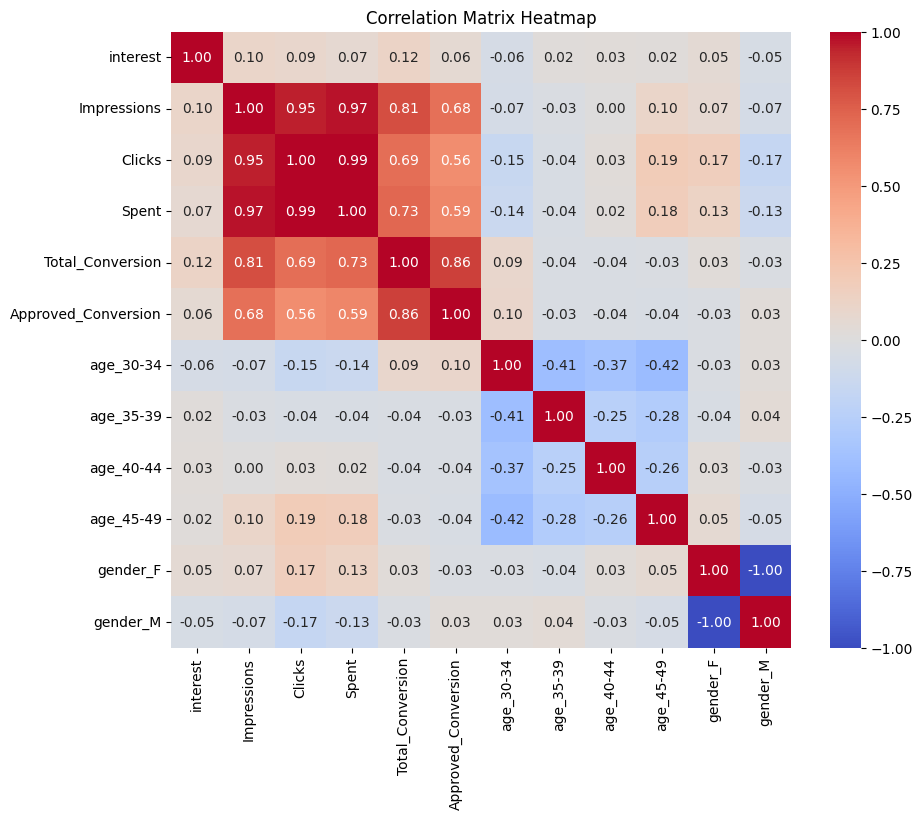

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

ESTA DE AQUÍ NO ES UNA TIME SERIES, CON LO QUE NO PODRÍAMOS HACER ESTE PROYECTO CON ESTO